In [ ]:
import numpy as np

from config.params import BASE_BOA_ARGO_DATA_PATH
from models.model import train_parameter_model_for_random_forest
from utils.log import Log
from utils.util import import_argo_ocean_variables, construct_argo_training_set, resource_argo_monthly_data

In [42]:
year = 2023
month = 11

# --------------------------- 读取单月数据 ------------------------
month_file = BASE_BOA_ARGO_DATA_PATH + "/BOA_Argo_{year}_{month}.nc".format(year=year, month=month)
Log.i("开始读取Argo数据 ...")
temperature, lon, lat, ild, mld, cmld = import_argo_ocean_variables(month_file)
# N月海表温度
march_sst = temperature[160:180, 60:80, 0]
# N月剖面温度
march_profile = temperature[160:180, 60:80, :]

开始读取Argo数据 ...


In [3]:
# --------------------------- 读取所有数据，生成训练集 ------------------------
datas = resource_argo_monthly_data(BASE_BOA_ARGO_DATA_PATH)
Log.d("数据读取完成: ")

# 生成训练集
input_data, output_data = construct_argo_training_set(datas)
Log.d("训练集生成完成: ", len(input_data), output_data.shape)

# 训练模型
model, x_test, y_test = train_parameter_model_for_random_forest(input_data, output_data)
# model_lstm, x_test_lstm, y_test_lstm = train_parameter_model_for_lstm(input_data, output_data)

数据读取完成: 
2023年9月数据: 
海表温度:  [24.3518009185791 24.730300903320312 25.140499114990234 25.654399871826172
 26.265199661254883 26.973800659179688 27.632999420166016
 28.12030029296875 28.44700050354004 28.69379997253418 --
 29.52239990234375 29.70709991455078 29.877899169921875 29.997100830078125
 30.04759979248047 30.03059959411621 29.96540069580078 29.850099563598633
 29.731800079345703 24.284000396728516 24.796199798583984
 25.26810073852539 25.789600372314453 26.401599884033203
 27.106599807739258 27.72800064086914 28.170799255371094 28.46139907836914
 -- 29.43269920349121 29.59160041809082 29.77239990234375
 29.957500457763672 30.096799850463867 30.1476993560791 30.1205997467041
 30.04520034790039 29.920400619506836 29.80430030822754 24.220399856567383
 25.012399673461914 25.552200317382812 26.05820083618164
 26.604400634765625 27.226499557495117 27.80030059814453
 28.248600006103516 28.6299991607666 29.047199249267578 29.371700286865234
 29.586599349975586 29.793100357055664 29.99659

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   40.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  2.7min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.7s


Model R^2 score: 0.9999990741673761


In [43]:
# ------------------------------------ 预测海温数据 ------------------------
Log.i("开始读取预测Argo 海表数据 ...")

pre_stations = np.array([tuple([i, j]) for i in np.arange(160, 180) for j in np.arange(-19, 1)])
pre_years = np.array([year] * len(pre_stations))
pre_months = np.array([month] * len(pre_stations))
pres_input = np.column_stack((pre_stations, pre_years, pre_months))
Log.i("预测的输入：", pres_input)

开始读取预测Argo 海表数据 ...
预测的输入： [[ 160  -19 2023   11]
 [ 160  -18 2023   11]
 [ 160  -17 2023   11]
 ...
 [ 179   -2 2023   11]
 [ 179   -1 2023   11]
 [ 179    0 2023   11]]


In [44]:
pres_result = np.empty((len(pres_input), 58), dtype=float)

for i in range(len(pres_input)):
    pre_y = model.predict(pres_input[i].reshape(1, -1))
    pres_result[i] = np.array(pre_y[0])

# 去除异常数据
pres_result[pres_result > 50] = np.nan
Log.d("pres result shape: ", pres_result.shape)
pres_sst = pres_result[:, 10].reshape(20, 20)

pres_profile = pres_result[:, :].reshape(20, 20, 58)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

pres result shape:  (400, 58)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


第 0 层的 RMSE:  0.16732994516057562
第 1 层的 RMSE:  0.17444640788227184
第 2 层的 RMSE:  0.16407636255176772
第 3 层的 RMSE:  0.1457989035760202
第 4 层的 RMSE:  0.12520821942561028
第 5 层的 RMSE:  0.11950513036268995
第 6 层的 RMSE:  0.11585846576186032
第 7 层的 RMSE:  0.10974756920401899
第 8 层的 RMSE:  0.12188698118769047
第 9 层的 RMSE:  0.13082427618466944
第 10 层的 RMSE:  0.14506585408107173
第 11 层的 RMSE:  0.14467158594567858
第 12 层的 RMSE:  0.1760937774110039
第 13 层的 RMSE:  0.22097887744062955
第 14 层的 RMSE:  0.24163584289549966


<>:13: SyntaxWarning: "is" with 'int' literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with 'int' literal. Did you mean "=="?
C:\Users\Administrator\AppData\Local\Temp\ipykernel_26460\28640571.py:13: SyntaxWarning: "is" with 'int' literal. Did you mean "=="?
  if i is 15 :


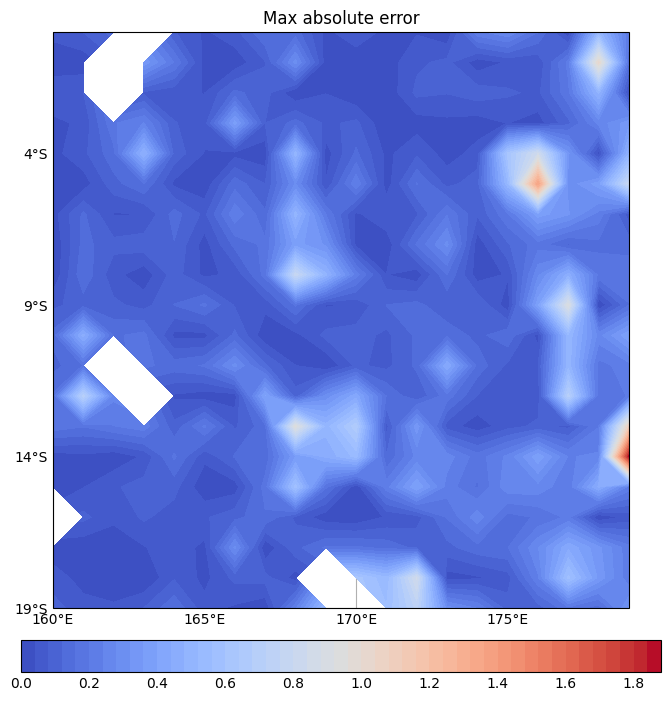

第 15 层的 RMSE:  0.26976781992356236
第 16 层的 RMSE:  0.2921344205451403
第 17 层的 RMSE:  0.3025066305083392
第 18 层的 RMSE:  0.285347343970511
第 19 层的 RMSE:  0.28533068600698114
第 20 层的 RMSE:  0.25548463529091603
第 21 层的 RMSE:  0.22353854935159265
第 22 层的 RMSE:  0.21202332540472535
第 23 层的 RMSE:  0.20029298544395482
第 24 层的 RMSE:  0.20503871694386747
第 25 层的 RMSE:  0.20844687990970415
第 26 层的 RMSE:  0.19160176821559005
第 27 层的 RMSE:  0.16818118811427382
第 28 层的 RMSE:  0.16318650516557356
第 29 层的 RMSE:  0.17787272702909104
第 30 层的 RMSE:  0.17485829871964145
第 31 层的 RMSE:  0.17059092553050995
第 32 层的 RMSE:  0.15767400326796435
第 33 层的 RMSE:  0.14322345302242798
第 34 层的 RMSE:  0.13156038318617247
第 35 层的 RMSE:  0.09521948448120979
第 36 层的 RMSE:  0.08423640132422995
第 37 层的 RMSE:  0.06792088342373112
第 38 层的 RMSE:  0.03910335953315379
第 39 层的 RMSE:  0.043560670571217396
第 40 层的 RMSE:  0.041464469584064426
第 41 层的 RMSE:  0.04416516916372535
第 42 层的 RMSE:  0.04037643873432542
第 43 层的 RMSE:  0.03398

In [45]:
# 计算每层的 RMSE
from utils.plot import plot_sst_distribution

rmse_values = []
max_abs_error = []

for i in range(58):
    pres_surface = pres_profile[:, :, i]
    march_surface = march_profile[:, :, i]
    
    abs_error = np.abs(pres_surface - march_surface)
    
    if i is 15 : 
        plot_sst_distribution(abs_error, title="Max absolute error")
        max_abs_error = abs_error
    
    mse = np.nanmean((pres_surface - march_surface) ** 2)
    rmse = np.sqrt(mse)

    rmse_values.append(rmse)
    Log.d(f"第 {i} 层的 RMSE: ", rmse)

# 计算 RMSE 的平均值
average_rmse = np.nanmean(rmse_values)
Log.d(f"所有层的的平均rmse：", average_rmse)

(360, 160)


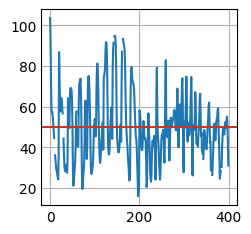

In [46]:
from matplotlib import cm # type: ignore
import matplotlib.pyplot as plt # type: ignore
from matplotlib.ticker import MultipleLocator # type: ignore

# 绘制混合层深度分布图
Log.i(mld.shape)

mld = mld.reshape(360, 160)[160:180, 60:80].flatten()
mean_mld = np.mean(mld)

plt.plot(mld)
plt.axhline(mean_mld, color='#c0392b')

<Axes: >

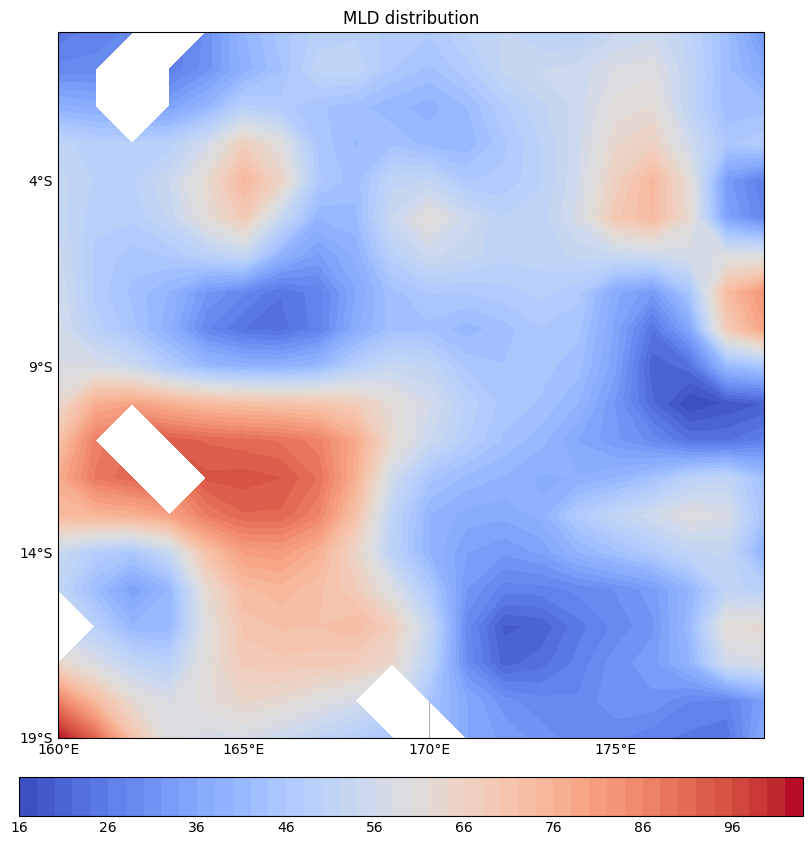

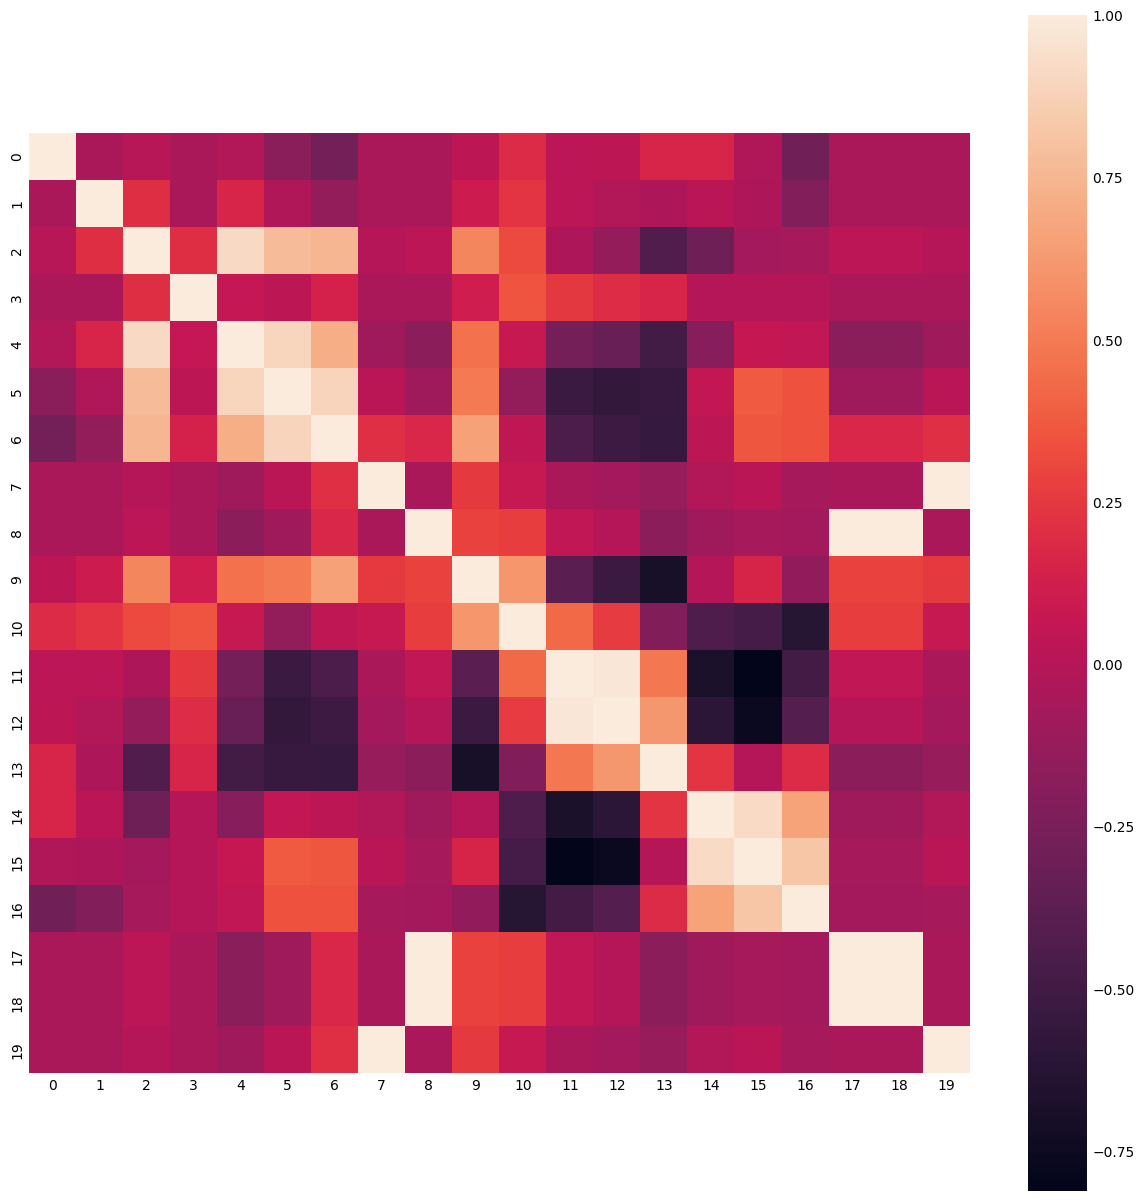

In [47]:
mld_dist = mld.reshape(20, 20)

import seaborn as sns
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

figure = plt.figure(figsize=(10, 8))
ax = figure.add_subplot(111, projection=ccrs.PlateCarree())
ax.set_title("MLD distribution")

ax.set_xticks(np.arange(160, 181, 5), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-19, 1, 5), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

lon = np.arange(160, 180, 1)
lat = np.arange(-19, 1, 1)
X, Y = np.meshgrid(lon, lat)

contour = ax.contourf(lon, lat, mld_dist, cmap='coolwarm', levels=50, transform=ccrs.PlateCarree())

cbar = figure.colorbar(contour, ax=ax, orientation='horizontal', pad=0.05, fraction=0.05)


figure, ax = plt.subplots(figsize=(12, 12))

corr = np.corrcoef(max_abs_error, mld_dist)[20:, 20:]

sns.heatmap(corr, square=True, annot=False, ax=ax)

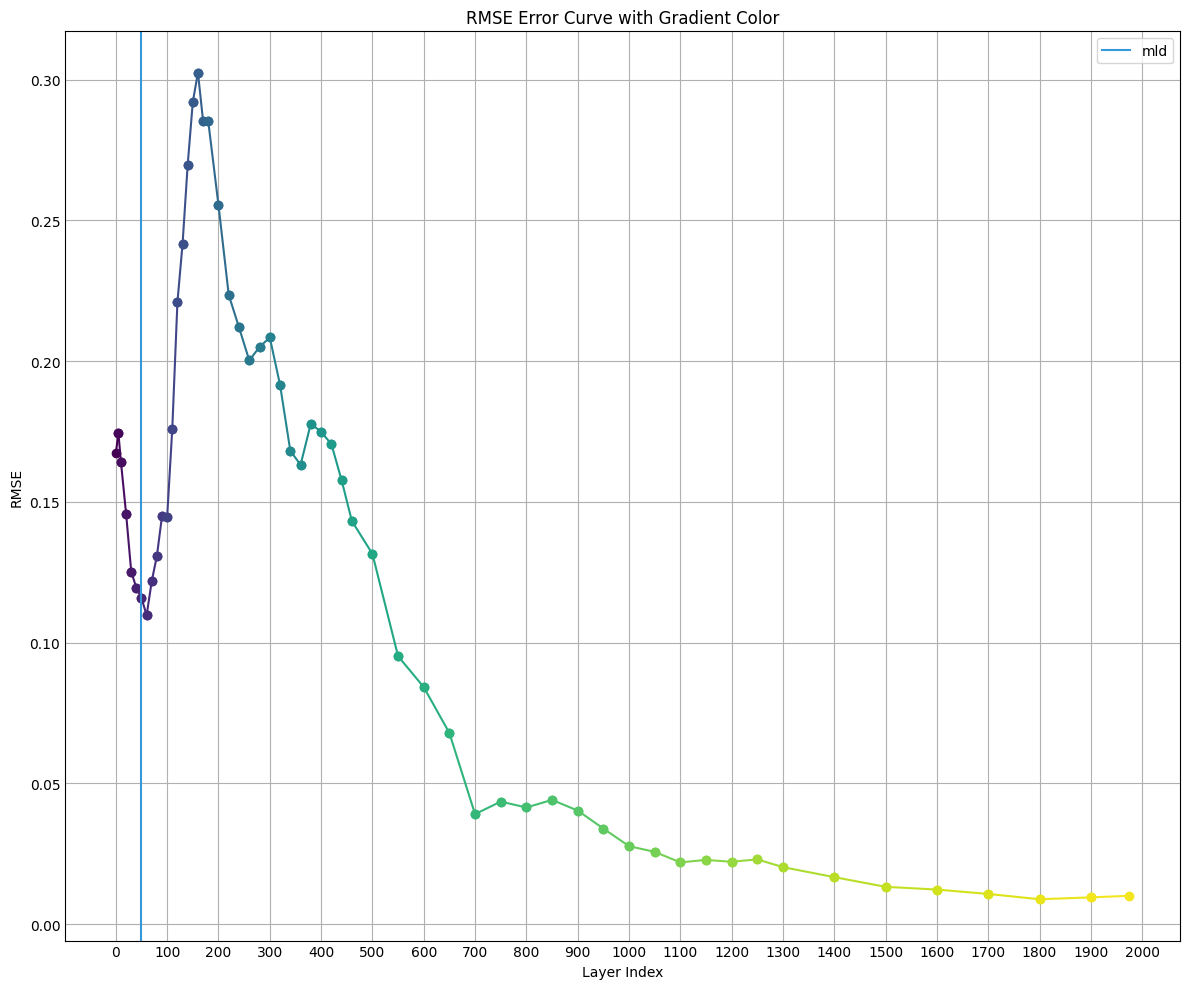

In [8]:
# 绘制 rmse 的分布图

deep_map = [
    0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
    110, 120, 130, 140, 150, 160, 170, 180, 200,
    220, 240, 260, 280, 300, 320, 340, 360, 380, 400,
    420, 440, 460, 500, 550, 600, 650, 700, 750, 800,
    850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250,
    1300, 1400, 1500, 1600, 1700, 1800, 1900, 1975
]

x = deep_map
y = rmse_values

colors = cm.viridis(np.linspace(0, 1, len(rmse_values)))

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 10))

# Plot the RMSE values with gradient color
for i in range(len(rmse_values) - 1):
    ax1.plot(x[i:i + 2], rmse_values[i:i + 2], marker='o', linestyle='-', color=colors[i])

ax1.set_xlabel('Layer Index')
ax1.set_ylabel('RMSE')
ax1.set_title('RMSE Error Curve with Gradient Color')
ax1.grid(True)

# Set x-axis major ticks to have an interval of 5
ax1.xaxis.set_major_locator(MultipleLocator(100))

# Show the plot
plt.tight_layout()
plt.axvline(mean_mld, color='#3498db', label='mld')
plt.legend()